# Prediction of Sleep Disorder

Author: Ruoyan Xiong

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction


Sleep is something that everyone needs, and my project is related to sleep health. The dataset I choose is called "Sleep Health and Lifestyle Dataset", and I will explore some data related to sleep disorder, and then use computers to calculate whether there is a relationship between them. Specifically, I want to build a model based on gender, BMI category, and sleep duration are used as inputs to predict whether a person has sleep disorder.

## Main Part

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import plotly.express as px
import matplotlib.pyplot as plt 

### Set Up the Data



* We import the data and make a pre-DataFrame as `df_pre`.

In [2]:
df_pre = pd.read_csv("Sleep.csv")
df_pre

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


* Take an overview of the data.

In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


* Check missing values:

In [4]:
df_pre.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There is no null valuse, so we do not need to drop the missing values.

* Drop the columns that I will not use, and make a copy set it as `df`:

In [5]:
df_pre.columns # see the columns we have

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df = df_pre.drop(['Person ID',"Blood Pressure","Occupation",'Physical Activity Level','Blood Pressure','Heart Rate', 'Daily Steps'], axis=1).copy()
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder
0,Male,27,6.1,6,6,Overweight,None
1,Male,28,6.2,6,8,Normal,None
2,Male,28,6.2,6,8,Normal,None
3,Male,28,5.9,4,8,Obese,Sleep Apnea
4,Male,28,5.9,4,8,Obese,Sleep Apnea


* Combine "Normal" and "Normal Weight" in "BMI Category" since they are almost the same.

In [7]:
df['BMI Category'] = df['BMI Category'].replace(["Normal","Normal Weight"], 'Normal')

* What I want to study is do people have sleep disorder or not, so I add a "Have Disorder" column, which is "True" if peopel have sleep disorder, and "False" if no. 
(Note: I classified None as no sleep disorder, and both sleep apnea and insomnia as have sleep disorder)

In [8]:
df["Having Disorder"] = (df["Sleep Disorder"] != "None")
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,Having Disorder
0,Male,27,6.1,6,6,Overweight,None,False
1,Male,28,6.2,6,8,Normal,None,False
2,Male,28,6.2,6,8,Normal,None,False
3,Male,28,5.9,4,8,Obese,Sleep Apnea,True
4,Male,28,5.9,4,8,Obese,Sleep Apnea,True


### Visualizing the data

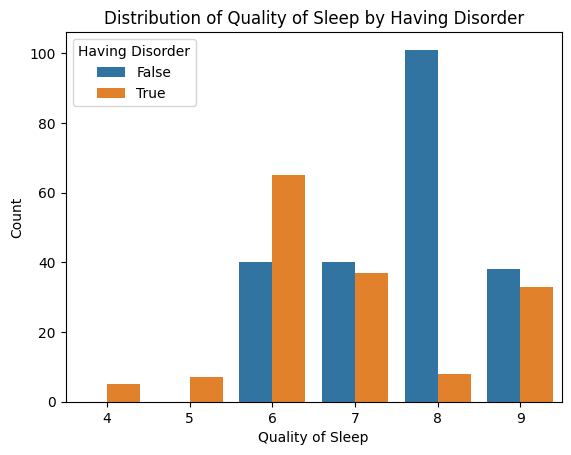

In [9]:
sns.countplot(x="Quality of Sleep", data = df, hue = "Having Disorder")
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.title("Distribution of Quality of Sleep by Having Disorder")
plt.show()

I using seaborn plot the the relationship between having disorder and quality of sleep above. We can see that people with low sleep quality have sleep disorder.

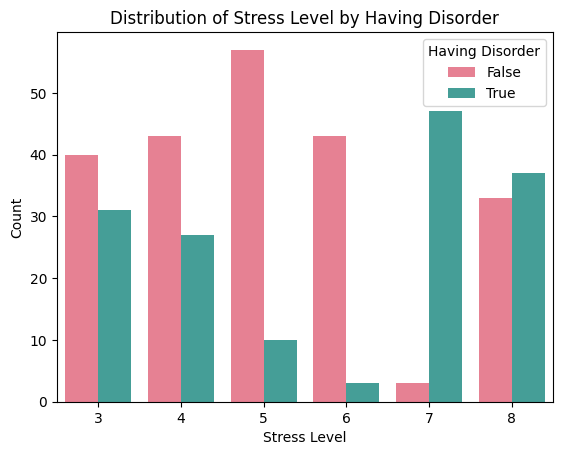

In [10]:
sns.countplot(x="Stress Level", data = df, hue = "Having Disorder",palette="husl")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Level by Having Disorder")
plt.show()

The relationship between stress level and having disorder is above. There is no very obvious impact of stress level on sleep disorder.

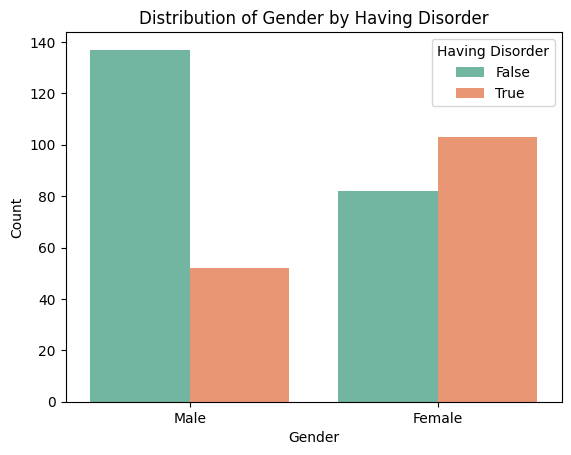

In [11]:
sns.countplot(x="Gender", data = df, hue = "Having Disorder",palette = "Set2")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender by Having Disorder")
plt.show()

From the Bar chart above, we can find that women are more likely to have sleep disorder than men.

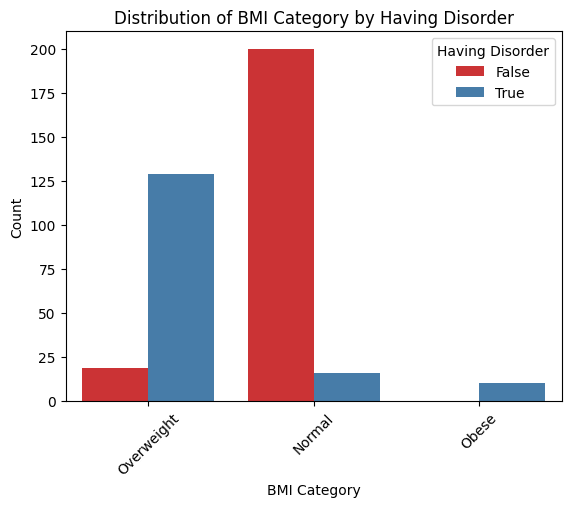

In [12]:
sns.countplot(x="BMI Category", data = df, hue = "Having Disorder",palette ="Set1")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.title("Distribution of BMI Category by Having Disorder")
plt.xticks(rotation=45)
plt.show()

From the Bar chart above, we can find that BMI Category may also be related to sleep disorder.


In [13]:
alt.Chart(df).mark_circle().encode(
    x = "Sleep Duration",
    y = "Having Disorder",
    color = "Stress Level",
). properties(title="Correlationbetween Sleep Duration, Having Disorder, and Stress Level")

alt.Chart(...)

From the scatterplot above, we can see that people with short sleep duration are more likely to have sleep disorder, while people with long sleep duration are less likely to have sleep disorder. Moreover, the longer the sleep duration, the lower the stress level. But overall, the connection between the stress level and having sleep disorder is not clear.

In [14]:
alt.Chart(df).mark_circle().encode(
    x = "Age",
    y = "Having Disorder",
    color = "Age"
).properties(title="Correlation Between Age and Having Disorder")

alt.Chart(...)

According to the chart above, there seems to be no obvious relationship between age and sleep disorder.

### Logistic Regression

I am going to use "Quality of Sleep", "Gender", and "BMI Category"as features to build a binary logistic regression model to predict the target having sleep disorder or not. 
* Set features columns as `cols`:

In [15]:
cols = ["Gender","Quality of Sleep","BMI Category"]

* Fixing Data
Furthermore, inorder to help with the logistic regression, I am making a new DataFrame `df1` which contain only float numbers.
Changing Male to 1, and Female to 2:

In [16]:
#Changing Male to 1, and Female to 2:
df1 = df.copy()
df1["Gender"] = df1["Gender"].replace(["Male"], 1)
df1["Gender"] = df1["Gender"].replace(["Female"], 2)
df1["Gender"] = df1["Gender"].astype(float)
# Changing Normal to 1, Overweight to 2, and Obese to 3:
df1["BMI Category"] = df1["BMI Category"].replace(["Normal"], 1)
df1["BMI Category"] = df1["BMI Category"].replace(["Overweight"], 2)
df1["BMI Category"] = df1["BMI Category"].replace(["Obese"], 3)
df1["BMI Category"] = df1["BMI Category"].astype(float)

In [17]:
df1.info() #Check the data type of df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            374 non-null    float64
 1   Age               374 non-null    int64  
 2   Sleep Duration    374 non-null    float64
 3   Quality of Sleep  374 non-null    int64  
 4   Stress Level      374 non-null    int64  
 5   BMI Category      374 non-null    float64
 6   Sleep Disorder    374 non-null    object 
 7   Having Disorder   374 non-null    bool   
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 20.9+ KB


* Spliting the dataset into trainning set and test set: 
80% for training, and 20% for test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df1[cols],df1["Having Disorder"],test_size=0.2,random_state=0)
X_train.shape, y_train.shape

((299, 3), (299,))

* Logistig Regression:

In [19]:
# Define and fit
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

* Check how well did our model do:

In [20]:
(y_test == clf.predict(X_test)).mean() # test score

0.9066666666666666

In [21]:
(y_train == clf.predict(X_train)).mean() # train score

0.9063545150501672

Check using the `score` method:

In [22]:
clf.score(X_test,y_test) # test score

0.9066666666666666

In [23]:
clf.score(X_train,y_train) # train score

0.9063545150501672

Since 0.9067 > 0.9064, there is no over fitting, also for 90.67% of the time, our model can predict correctly if a person has sleep dioder or not.

* Add the predict result to `df` as `LR_pred`

In [24]:
df["LR_pred"] = clf.predict(df1[cols])
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,Having Disorder,LR_pred
0,Male,27,6.1,6,6,Overweight,None,False,True
1,Male,28,6.2,6,8,Normal,None,False,False
2,Male,28,6.2,6,8,Normal,None,False,False
3,Male,28,5.9,4,8,Obese,Sleep Apnea,True,True
4,Male,28,5.9,4,8,Obese,Sleep Apnea,True,True


In [25]:
df.sample(3) #Randomly choose 3 row to test the model and check the predict probability

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,Having Disorder,LR_pred
214,Male,43,7.8,8,5,Normal,None,False,False
359,Female,59,8.1,9,3,Overweight,None,False,True
57,Male,32,6.0,6,8,Normal,None,False,False


In [26]:
clf.classes_

array([False,  True])

In [27]:
clf.predict_proba(df1.loc[[241,108,33],cols])

array([[0.1634027 , 0.8365973 ],
       [0.94845796, 0.05154204],
       [0.86239117, 0.13760883]])

For label 241 row, the model is 83.66% sure that the person have sleep disorder, which is same as the actual result.
For label 108 row, the model is 94.85% sure that the person do not have sleep disorder, which is same as the actual result.
For label 33 row, the model is 96.24% sure that the person do not have sleep disorder, which is same as the actual result.
All these samples are good since we get consistent result

* Visualizing the model by using confusion matrix:

Text(0.5, 1.0, 'Sleep Disorder Prediction (logistic regression)')

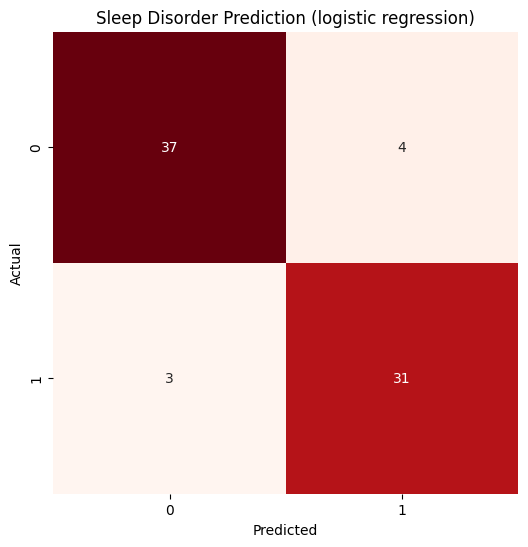

In [28]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Sleep Disorder Prediction (logistic regression)')

This chart shows that for most of the time, our logistic regression model make decisions same as the actual data.

### Decision Tress Classification

In the decesion tree model, I will use train and test dets to help with finding the scores of the model, and I change the max leaf nodes to make the analyzing easier.

In [29]:
cols # Remind the features

['Gender', 'Quality of Sleep', 'BMI Category']

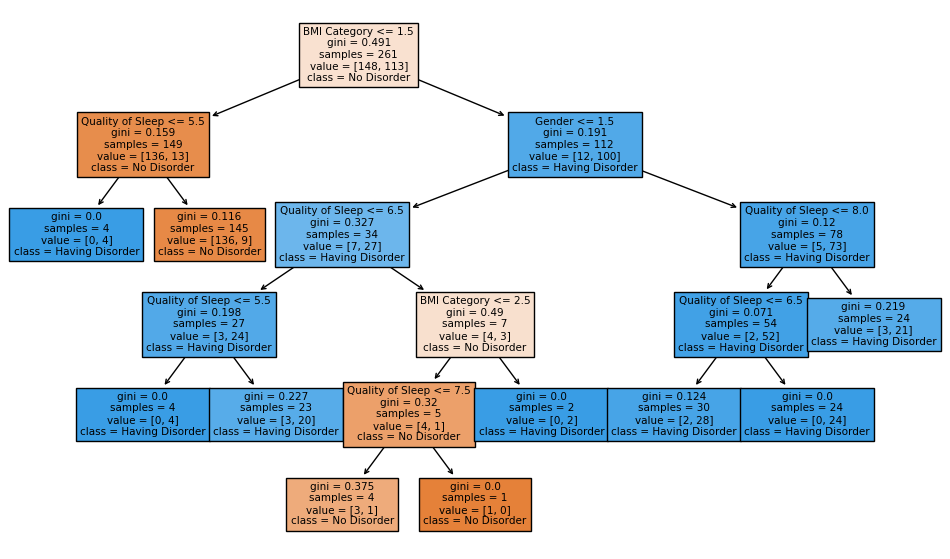

In [30]:
# Define and fit
X =df1[cols]
y = df1["Having Disorder"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10)
clf = clf.fit(X_train, y_train)
#Plot
plt.figure(figsize=(12, 7))
tree.plot_tree(clf, filled=True, feature_names=cols, class_names=["No Disorder", "Having Disorder"])
plt.show()


* Test score and train score of our decision tree:

In [31]:
clf.score(X_test,y_test) #Test score

0.9203539823008849

In [32]:
clf.score(X_train,y_train) #Train score

0.9310344827586207

For 92% of the time, our model can predict a person has sleep dioder or not. However, the test score 0.9204 is smaller than the train score 0.931, which indicates that the model may be overfitting the training data.

* Visualize the Decission Tree Classify Model

Text(0.5, 1.0, 'Sleep Disorder Prediction (Decision tree)')

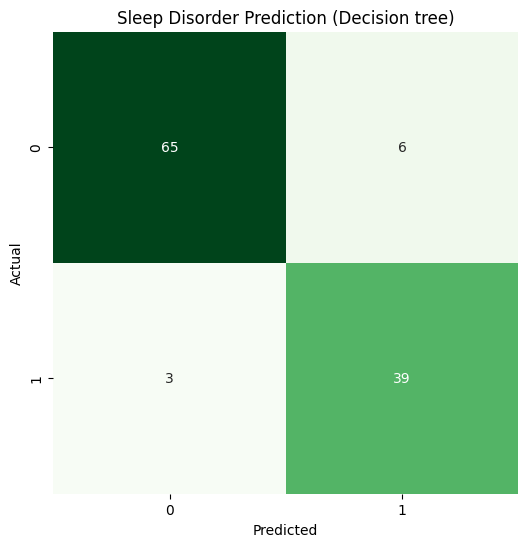

In [33]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Sleep Disorder Prediction (Decision tree)')

According to the chart above, the performance of decision tree model is worse than the logistic regression model. 
Conclusively, we can say that there is relationship between gender, quality of Sleep, BMI Category, and sleep disorder.

## Summary

First, I organized the data. I merged some similar categorical data and added a cloumn that is convenient for binary logistic regression. Then, I looked at each factor that might be related to sleep disorder, and drew some bar charts and scatterplots to observe the relationship between them. Then I picked out three factors that were most likely to be related to sleep order, and they were, "Gender", "BMI Category", and "Sleep Duration". Then I divided the data into train set and test set, and built a model using logistic regression. Subsequently, I analyzed the test score and train score. By calculating, drawing, and randomly checking three samples, I found that "Gender", "BMI Category", and "Sleep Duration" and "Sleep Disorder" were indeed There is a relationship. Through this model I can predict whether a person has disorder. Finally, I used Decision Tree to analyze the same data. The performance of this model was worse than Logistic Regression, and it might be overfitting.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

* List any other references that you found helpful.
I learned the seaborn chart here https://www.kaggle.com/code/laxmivatsalyadaita/sleep-health-prediction#Logistic-Regression
I learn the confusion matrix here https://www.kaggle.com/code/amalyasser/shhh-i-want-to-sleep#Models-evaluation-%F0%9F%93%9D-
I learn the Decision Tree here https://scikit-learn.org/stable/modules/tree.html



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a98c481e-691c-4536-9e2c-f76b3668f342' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>